In [38]:
import h5py
import os

from keras.applications import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [41]:
#path to training data
DATA_PATH = '../train/'
#DATA_PATH = "..\\..\\fish\\train\\"

#Number of clusters for K-Means
N_CLUSTS = 250

#Number of clusters used for validation
N_VAL_CLUSTS = 50

SEED = 42
np.random.seed(SEED)

IMG_WIDTH = 640
IMG_HEIGHT = 360

In [4]:
base_model = VGG16(weights = 'imagenet', include_top = False, input_shape = (IMG_HEIGHT, IMG_WIDTH, 3))
model = Model(input = base_model.input, output = base_model.get_layer('block4_pool').output)

40960/35363 [==================================] - 0s 


In [5]:
def preprocess_image(path):
    img = image.load_img(path, target_size = (IMG_HEIGHT, IMG_WIDTH))
    arr = image.img_to_array(img)
    arr = np.expand_dims(arr, axis = 0)
    return preprocess_input(arr)

In [42]:
subsample = []
for fish in os.listdir(DATA_PATH):
    if(os.path.isfile(os.path.join(DATA_PATH, fish))): 
        continue
    subsample_class = [os.path.join(DATA_PATH, fish, fn) for 
                       fn in os.listdir(os.path.join(DATA_PATH, fish))]
    subsample += subsample_class
len(subsample)

3777

In [7]:
%%time
preprocessed_images = np.vstack([preprocess_image(fn) for fn in subsample])
vgg_features = model.predict(preprocessed_images)
vgg_features = vgg_features.reshape(len(subsample), -1)

CPU times: user 7min 25s, sys: 1min 49s, total: 9min 15s
Wall time: 10min 8s


In [18]:
%%time
km = KMeans(n_clusters = N_CLUSTS, n_jobs = -1)
clust_preds = km.fit_predict(StandardScaler().fit_transform(TwoDim_dataset))

CPU times: user 1min 22s, sys: 9.74 s, total: 1min 31s
Wall time: 55min 13s


In [ ]:
save_array('clusters.dat', clust_preds)
#clust_preds = load_array('clusters.dat')

In [ ]:
val_clusters = np.random.choice(range(N_CLUSTS), N_VAL_CLUSTS, replace = False)
val_sample = np.array(subsample)[np.in1d(clust_preds, val_clusters)]

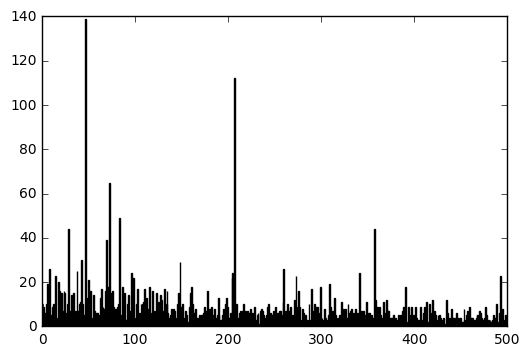

In [31]:
import matplotlib.pyplot as plt
plt.hist(clust_preds, bins=500)
plt.show()

In [53]:
clust_preds[1:20]

array([201, 309, 194,  49, 309, 218, 266,  49, 218, 204, 201,  49, 309, 194,  49, 358, 482,  49, 192])